In [1]:
import torch
import torch.nn as nn

In [10]:
input_dim = 5
output_dim = 4

lstm = nn.LSTM(input_dim, output_dim) # слой

In [11]:
batch = 100
seq_len = 20 #до 20 слов в предложении

x = torch.randn(seq_len, batch, input_dim) # получили батчи с векторизрованными предложениями

In [12]:
o, _ = lstm(x)  # создали один слой лстм

In [15]:
print(o.size(), x.size())

torch.Size([20, 100, 4]) torch.Size([20, 100, 5])


In [20]:
num_layers = 2

lstm = nn.LSTM(input_dim, output_dim, num_layers) # создадим 2-х слойную лстм-ку

Основная идея LSTM-ячейки состоит в том, что кроме вектора промежуточного состояния ${h_t}$, который никак не контролируется, есть вектор ${c_t}$, который является памятью ячейки и задан явным образом.

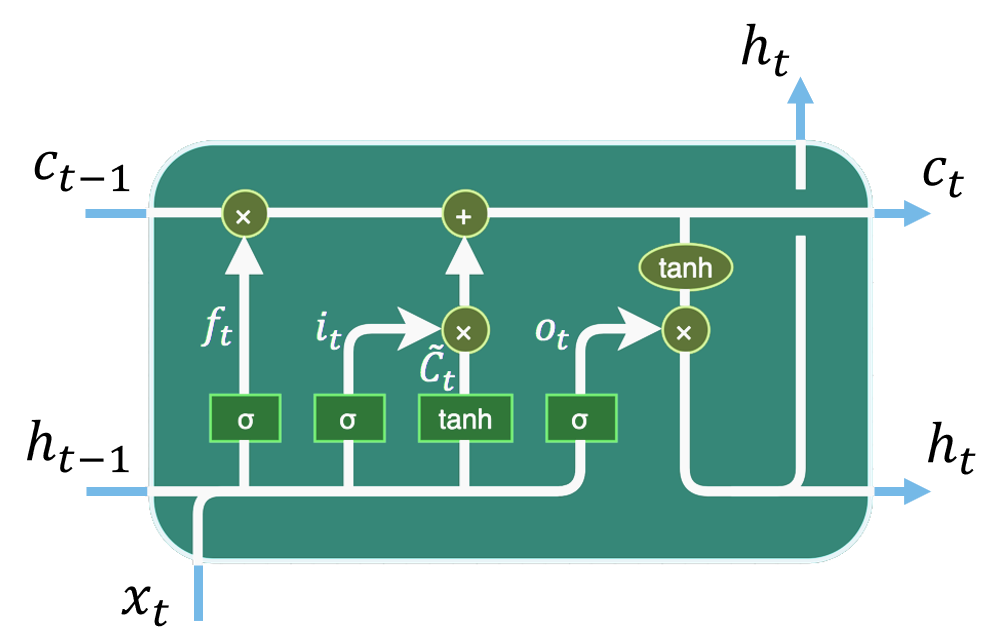


Для программирования памяти ячейки используются контролируемые гейты, записывающие и считывающие информацию из ячейки. В LSTM-ячейках есть три гейта.

Схема LSTM довольно сложная и требует некоторого времени для понимания. Эта схема избавляет от необходимости обрабатывать только короткие цепочки. Благодаря тому, что нейронная сеть сама контролирует, что можно забыть, мы можем обрабатывать длинные цепочки. Проблема с градиентами в этой схеме тоже решается.

Подробнее об LSTM вы узнаете в курсе специальности, однако предлагаем посмотреть создание такой схемы на практике.

In [22]:
h = torch.randn(num_layers, batch, output_dim)
c = torch.randn(num_layers, batch, output_dim)  

o, (h,c) = lstm(x, (h,c))

In [23]:
print(o.size(), x.size())

torch.Size([20, 100, 4]) torch.Size([20, 100, 5])


In [24]:
lstm = nn.LSTM(input_dim, output_dim, num_layers, bidirectional=True) #bidirectional - создать двунаправленную лстм-ку

Без  biderectional
1 2 3 4 5

C biderectional после обработки прямой последовательности идет обработка обратной последовательности
1 2 3 4 5 + 5 4 3 2 1

In [25]:
o_b, _ = lstm(x)

In [26]:
print(o_b.size(),o.size()) 

torch.Size([20, 100, 8]) torch.Size([20, 100, 4])
